# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.4 Thompson Beta

In [6]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [7]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a Thompson Beta algorithm. 



In [29]:
#Tompson Beta policy
class ThompsonBeta(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        #PRIOR Hyper-params: successes = 1; failures = 1
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.name = "Thompson Beta"
        
        #For each arm, maintain success and failures
        self.successes = np.ones(num_actions, dtype = np.int)
        self.failures = np.ones(num_actions, dtype = np.int)
        
    def act(self):
        """Sample beta distribution from success and failures"""
        
        """Play the max of the sampled values"""
        sample_betas = []
        for i in range(self.num_actions):
            aux = np.random.beta(self.successes[i], self.failures[i])
            sample_betas.append(aux)
        current_action = np.argmax(sample_betas)
        return current_action
    
    def feedback(self, action, reward):
        if reward > 0:
            self.successes[action] += 1
        else:
            self.failures[action] += 1
        self.total_counts[action] += 1

Now let's prepare the simulation. 

In [34]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"


What do you think the regret graph would look like?

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

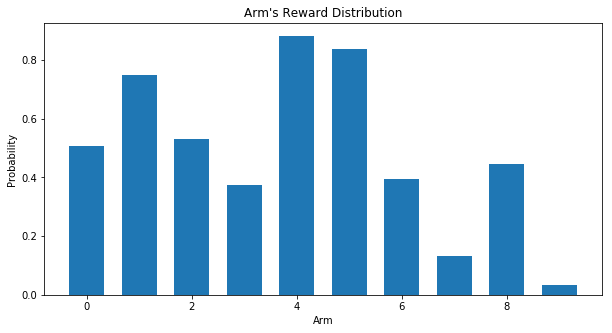

--------------------------------------------------
Policy: Thompson Beta 
Average Reward: 0.8768 
Average Regret: 0.0036267520952729063
Arm pulls: [8.000e+00 9.200e+01 1.000e+01 6.000e+00 9.808e+03 5.600e+01 8.000e+00
 4.000e+00 4.000e+00 4.000e+00]


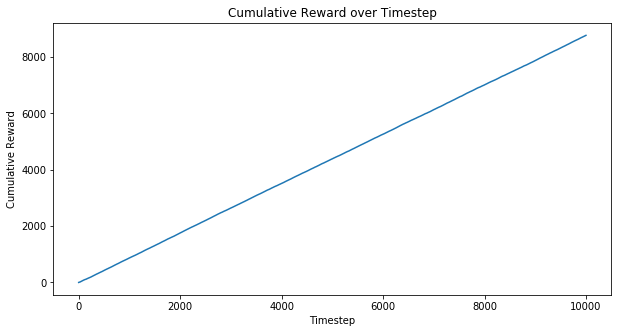

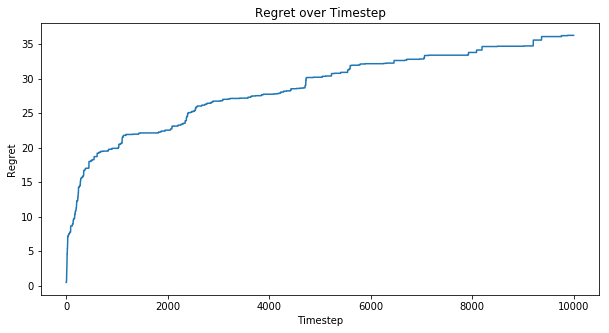

In [35]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = ThompsonBeta(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now let's prepare another simulation by setting a different distribution, that is set distribion = "normal"

Run the simulation and observe the results.

What do you think the regret graph would look like?